# **uv-theory for LJ Chains**

In [1]:
from feos.si import *
from feos.eos import *
from feos.uvtheory import *
#from feos.eos.estimator import *

import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import seaborn as sns
import numpy as np

colors = sns.color_palette("winter", 10)
sns.set_context("talk")
sns.set_style("ticks")

In [2]:
rep = 12.0
att = 6.0
sigma = 1.0
epsilon_k = 1.0

In [3]:
# Read Simulation Data from Deiters
deiters_data = pd.read_csv("reference_data/deiters_pure_chains.txt")
#deiters_data.head()

data = {
    'm': [1, 4, 6, 12, 3, 5, 8, 16],
    'Tc': [1.290, 2.260, 2.500, 2.920, 2.041, 2.380, 2.680, 3.080],
    'rho_c': [0.308, 0.264, 0.245, 0.210, 0.274, 0.253, 0.230, 0.200]
}

deiters_cp = pd.DataFrame(data)

In [4]:
minimum_temperatue = 1 * epsilon_k * KELVIN

diagrams = {}

for mi in deiters_data.n.unique():
    parameters = UVParameters.new_simple(mi, rep, att, sigma, epsilon_k)
    eos = EquationOfState.uvtheory(parameters, max_eta=0.5, perturbation=Perturbation.BarkerHenderson)
    state_cp = State.critical_point(eos, initial_temperature=epsilon_k * 15 * KELVIN)
    if mi >= 8:
        minimum_temperatue = state_cp.temperature * 0.57
    else:
        minimum_temperatue = state_cp.temperature * 0.4
    dia = PhaseDiagram.pure(eos, minimum_temperatue, critical_temperature=epsilon_k * 15 * KELVIN, npoints=200)
    diagrams.update({mi: dia})

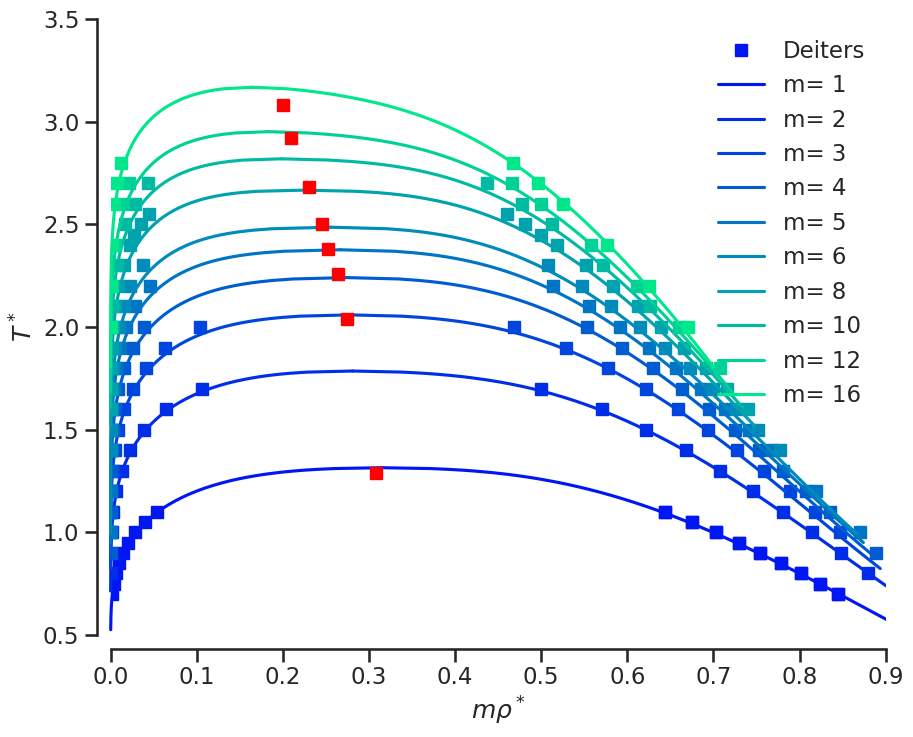

In [5]:
plt.figure(figsize=(10, 8))

for i, (mi, dia) in enumerate(diagrams.items()):
    dd = deiters_data[deiters_data.n == mi]
    if i == 0:
        plt.plot(dd.rhol, dd.t, "s", color=colors[i], label="Deiters")
    plt.plot(dd.rhol, dd.t, "s", color=colors[i])
    plt.plot(dd.rhov, dd.t, "s", color=colors[i])
    
    plt.plot(dia.liquid.density * NAV * (sigma * ANGSTROM)**3 * mi, dia.liquid.temperature / (epsilon_k * KELVIN), color=colors[i], label=f"m= {mi}")
    plt.plot(dia.vapor.density * NAV * (sigma * ANGSTROM)**3 * mi, dia.vapor.temperature / (epsilon_k * KELVIN),color=colors[i], clip_on=False)
    



plt.xlim(0.0, 0.9)
plt.ylim(0.5, 3.5)
sns.despine(offset=10)
plt.legend(frameon=False)
plt.ylabel(r"$T^*$")
plt.xlabel(r"$m\rho^*$");

plt.plot(deiters_cp.rho_c, deiters_cp.Tc, 'rs')

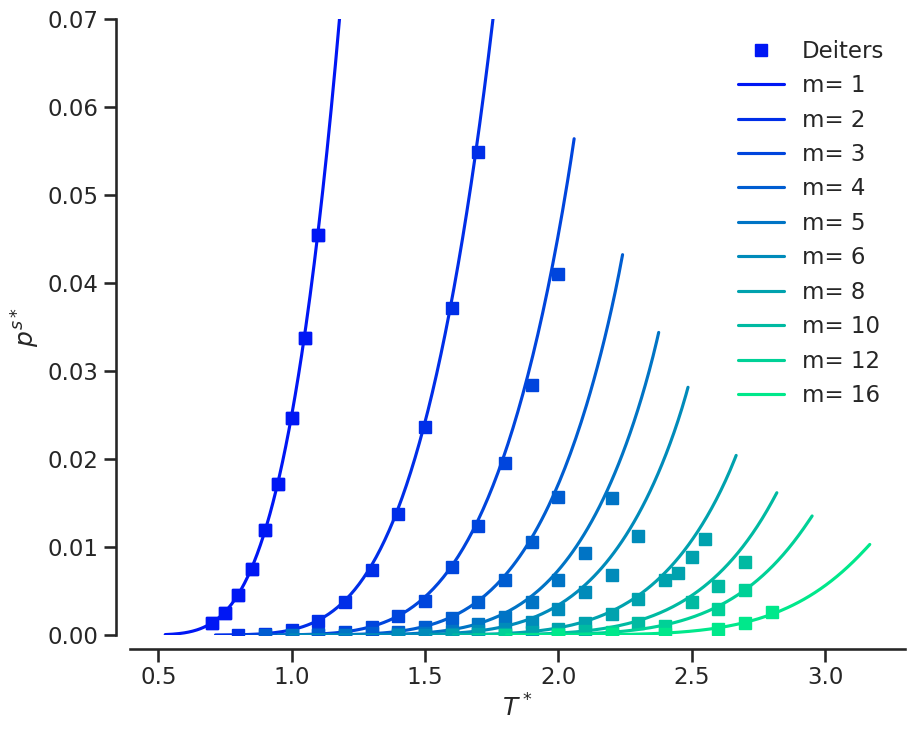

In [6]:
plt.figure(figsize=(10, 8))

for i, (mi, dia) in enumerate(diagrams.items()):
    dd = deiters_data[deiters_data.n == mi]
    if i == 0:
        plt.plot(dd.t, dd.pv, "s", color=colors[i], label="Deiters")
    plt.plot(dd.t, dd.pv, "s", color=colors[i])
    #plt.plot(dd.rhov, dd.t, "s", color=colors[i])
    #print(dia.vapor.pressure * (sigma * ANGSTROM)**3 / (KB * epsilon_k * KELVIN))
    plt.plot( dia.vapor.temperature / (epsilon_k * KELVIN), dia.vapor.pressure * (sigma * ANGSTROM)**3 / (KB * epsilon_k * KELVIN), color=colors[i], label=f"m= {mi}")
    #plt.plot(dia.vapor.density * NAV * (sigma * ANGSTROM)**3 * mi, dia.vapor.temperature / (epsilon_k * KELVIN),color=colors[i], clip_on=False)
    


#plt.xlim(0.0, 0.9)
plt.ylim(0.0, 0.07)
sns.despine(offset=10)
plt.legend(frameon=False)
plt.xlabel(r"$T^*$")
plt.ylabel(r"$p^{s*}$");
#plt.yscale('log')

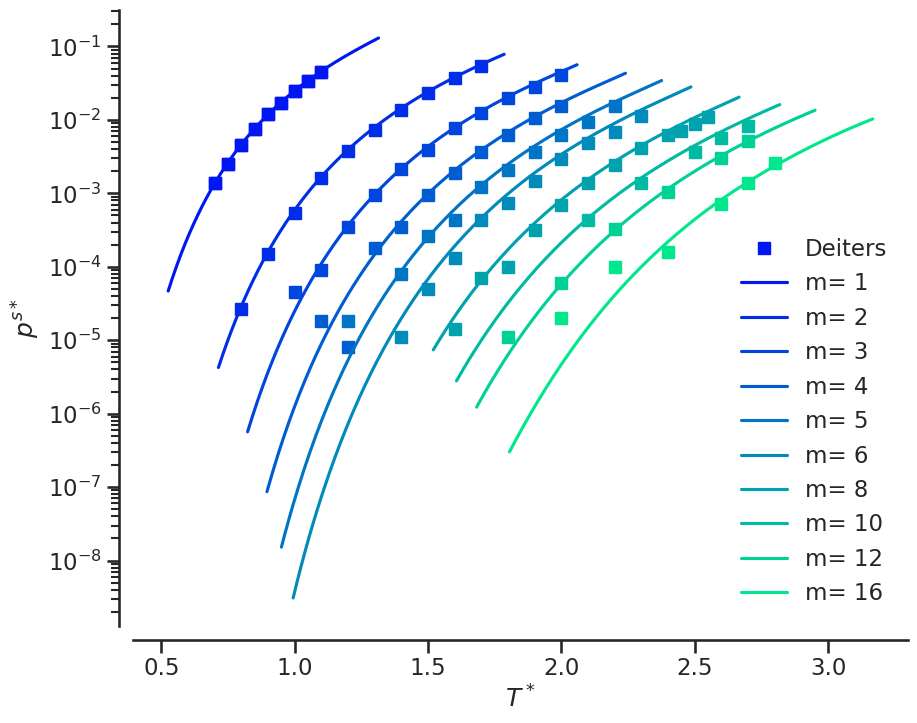

In [7]:
plt.figure(figsize=(10, 8))

for i, (mi, dia) in enumerate(diagrams.items()):
    dd = deiters_data[deiters_data.n == mi]
    if i == 0:
        plt.plot(dd.t, dd.pv, "s", color=colors[i], label="Deiters")
    plt.plot(dd.t, dd.pv, "s", color=colors[i])
    #plt.plot(dd.rhov, dd.t, "s", color=colors[i])
    #print(dia.vapor.pressure * (sigma * ANGSTROM)**3 / (KB * epsilon_k * KELVIN))
    plt.plot( dia.vapor.temperature / (epsilon_k * KELVIN), dia.vapor.pressure * (sigma * ANGSTROM)**3 / (KB * epsilon_k * KELVIN), color=colors[i], label=f"m= {mi}")
    #plt.plot(dia.vapor.density * NAV * (sigma * ANGSTROM)**3 * mi, dia.vapor.temperature / (epsilon_k * KELVIN),color=colors[i], clip_on=False)
    


#plt.xlim(0.0, 0.9)
#plt.ylim(0.0, 0.07)
sns.despine(offset=10)
plt.legend(frameon=False)
plt.xlabel(r"$T^*$")
plt.ylabel(r"$p^{s*}$");
plt.yscale('log')

In [8]:
minimum_temperatue = 1 * epsilon_k * KELVIN
#print(minimum_temperatue)

diagrams = {}
mvec = [1, 2,3, 8, 10, 16, 20, 30, 40, 50]
for mi in mvec:
    parameters = UVParameters.new_simple(mi, rep, att, sigma, epsilon_k)
    eos = EquationOfState.uvtheory(parameters, max_eta=0.5, perturbation=Perturbation.BarkerHenderson)
    state_cp = State.critical_point(eos, initial_temperature=epsilon_k * 15 * KELVIN)
    if mi >= 8:
        minimum_temperatue = state_cp.temperature * 0.57
    else:
        minimum_temperatue = state_cp.temperature * 0.4
    dia = PhaseDiagram.pure(eos, minimum_temperatue, critical_temperature=epsilon_k * 15 * KELVIN, npoints=200)
    diagrams.update({mi: dia})

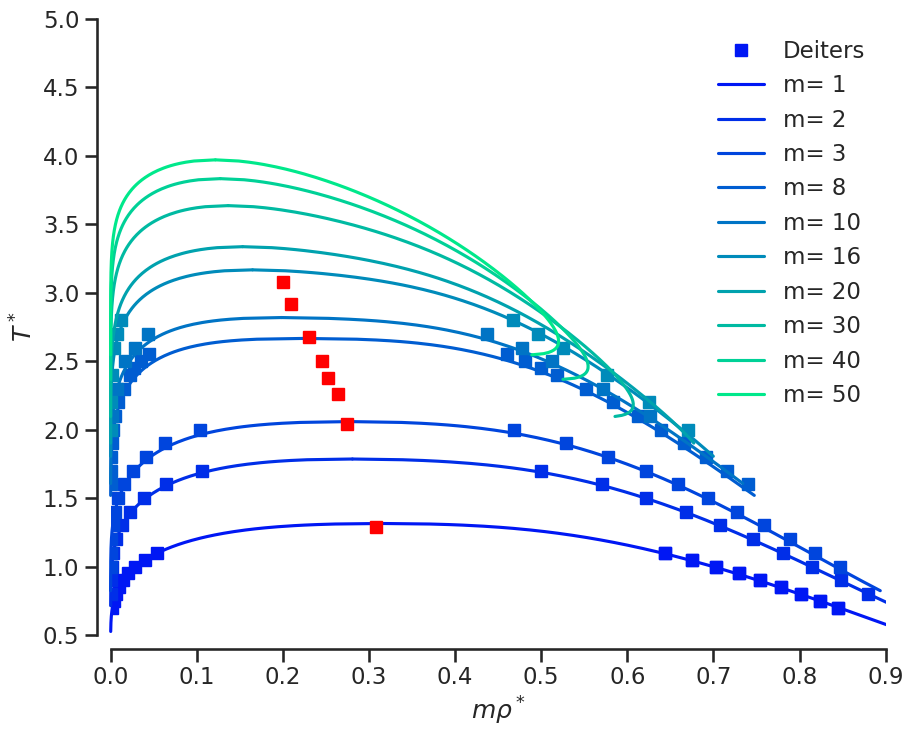

In [9]:
plt.figure(figsize=(10, 8))

for i, (mi, dia) in enumerate(diagrams.items()):
    dd = deiters_data[deiters_data.n == mi]
    if i == 0:
        plt.plot(dd.rhol, dd.t, "s", color=colors[i], label="Deiters")
    plt.plot(dd.rhol, dd.t, "s", color=colors[i])
    plt.plot(dd.rhov, dd.t, "s", color=colors[i])
    
    plt.plot(dia.liquid.density * NAV * (sigma * ANGSTROM)**3 * mi, dia.liquid.temperature / (epsilon_k * KELVIN), color=colors[i], label=f"m= {mi}")
    plt.plot(dia.vapor.density * NAV * (sigma * ANGSTROM)**3 * mi, dia.vapor.temperature / (epsilon_k * KELVIN),color=colors[i], clip_on=False)
    



plt.xlim(0.0, 0.9)
plt.ylim(0.5,5)
sns.despine(offset=10)
plt.legend(frameon=False)
plt.ylabel(r"$T^*$")
plt.xlabel(r"$m\rho^*$");

plt.plot(deiters_cp.rho_c, deiters_cp.Tc, 'rs')